# importing libraries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# loading dataset

In [197]:
data=pd.read_csv("banking_data.csv")

In [198]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


# Access first five rows

In [199]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


# Access last five rows

In [200]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


# Displaying all columns names

In [201]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [202]:
for i in data.columns:
    print(i)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
y


# Checking the datatypes

In [203]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

# Checking no of rows and columns

In [204]:
data.shape

(32950, 16)

In [205]:
print(len(data))

32950


# Displaying information

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


# Checking missing values

In [207]:
data.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [208]:
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [209]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


# target class count

In [210]:
data["y"].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

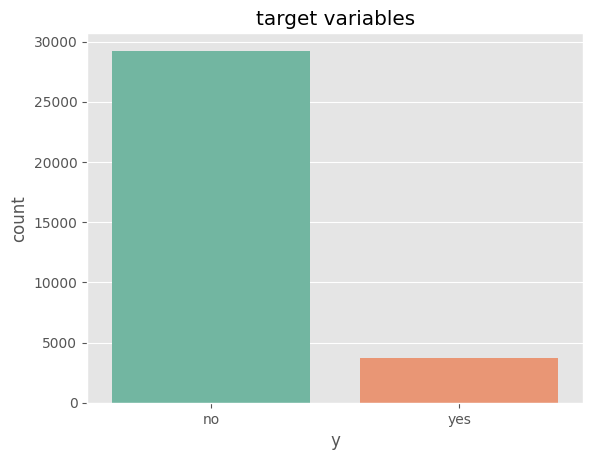

In [211]:
sns.countplot(x="y",data=data,palette="Set2")
plt.title("target variables")
plt.show()

# sns.countplot(data["y"], palette="Set2")
# plt.title("Target Variable Counts")
# plt.show()


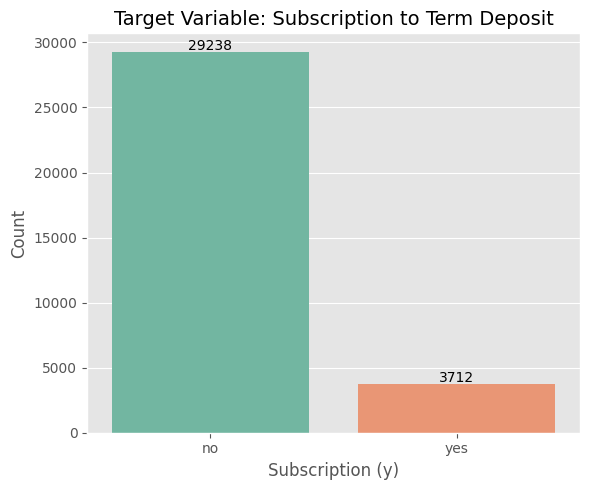

In [212]:

plt.figure(figsize=(6, 5))
ax = sns.countplot(x=data["y"], palette="Set2")

# Add count labels on bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count + 500),
                ha='center', va='center')

plt.title("Target Variable: Subscription to Term Deposit", fontsize=14)
plt.xlabel("Subscription (y)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# finding the percentage of No and Yes

In [213]:
print("percentage of No and Yes")
data['y'].value_counts()/len(data)*100

percentage of No and Yes


y
no     88.734446
yes    11.265554
Name: count, dtype: float64

# identifying the categorical variables

In [214]:
cat_var=data.select_dtypes(include=["object"]).columns

In [215]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

# plotting bar chart for each categorical variable

job


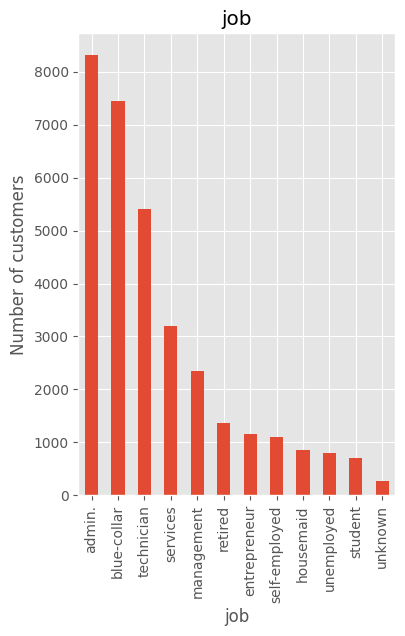

marital


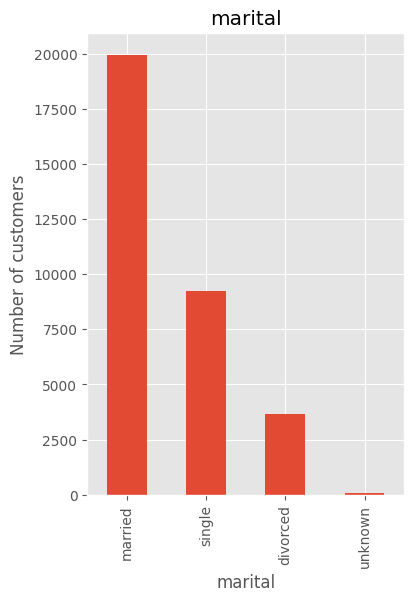

education


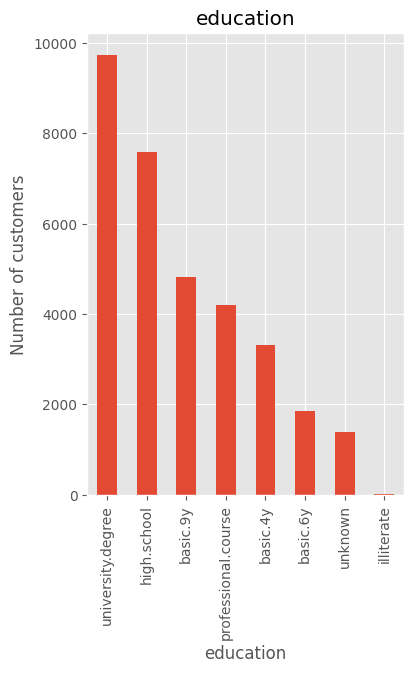

default


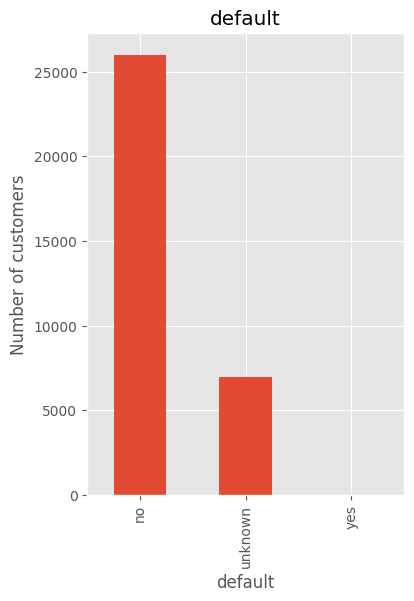

housing


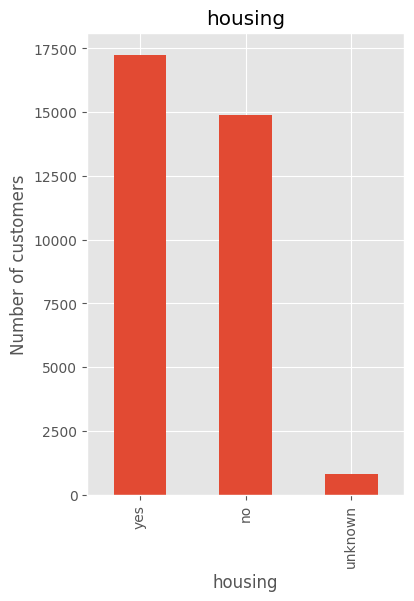

loan


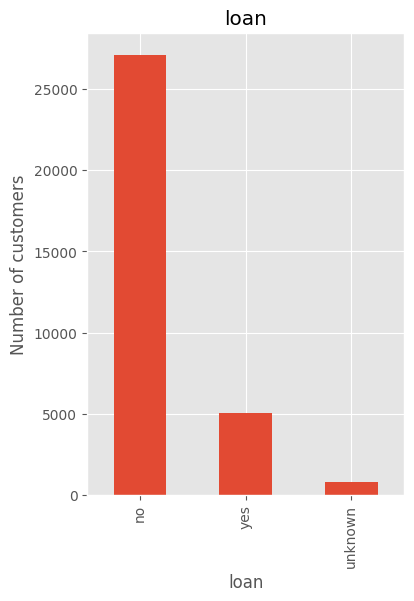

contact


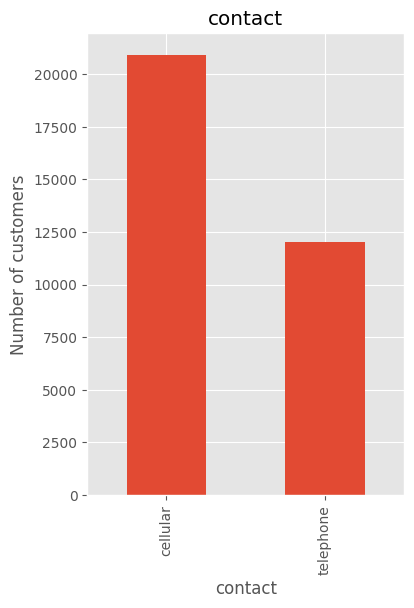

month


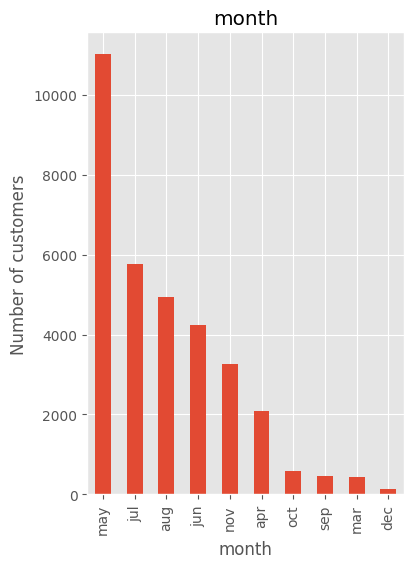

day_of_week


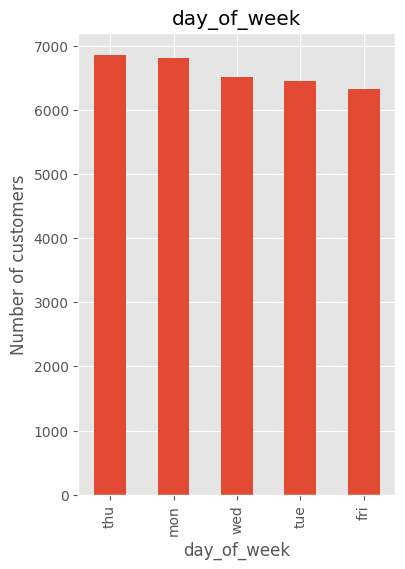

poutcome


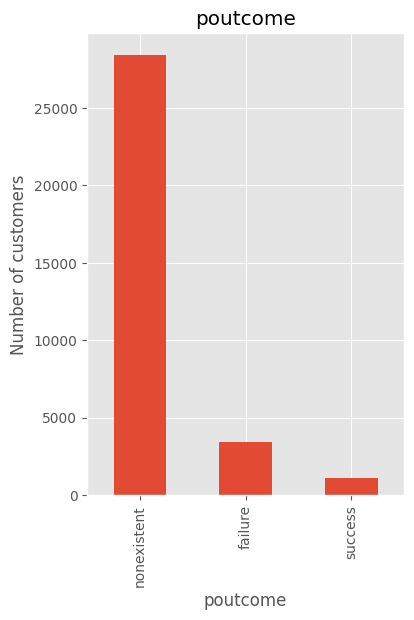

y


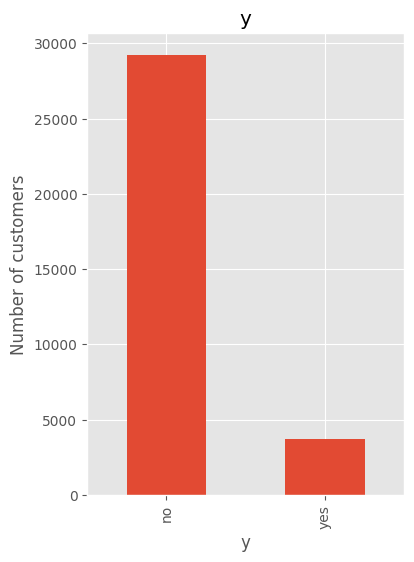

In [216]:
plt.style.use("ggplot")

for column in cat_var:
    print(column)
    plt.figure(figsize=(9,6))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel("Number of customers")
    plt.title(column)
    plt.show()
               

               
    

In [217]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


# Replacing unknown with mode

In [218]:
for column in cat_var:
    mode=data[column].mode()[0]
    data[column]=data[column].replace("unknown","mode")
  

# identifying the numerical columns

In [219]:
num_col=data.select_dtypes(include=np.number)
num_col.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


# Plotting histogram for each numerical variable

age


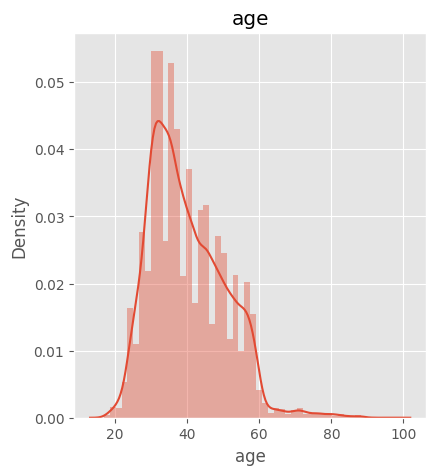

duration


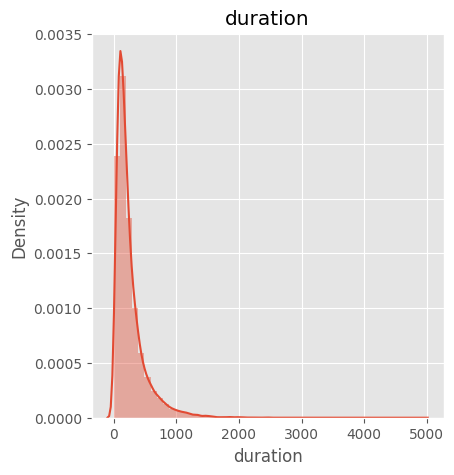

campaign


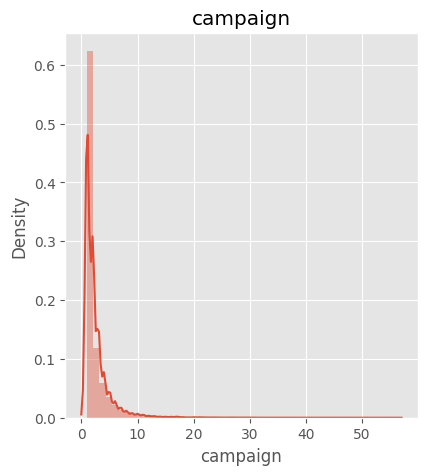

In [220]:
plt.style.use("ggplot")
for column in ["age","duration","campaign"]:
    print(column)
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(data[column],kde=True)
    plt.xlabel(column)
    plt.title(column)
    plt.show()

In [221]:
data.drop(columns=["pdays","previous"],axis=1,inplace=True)

job


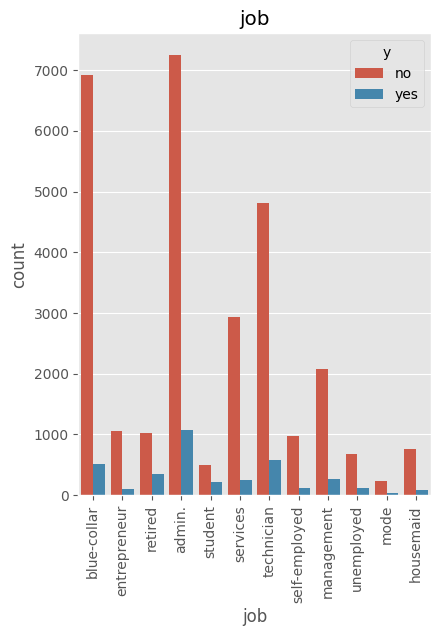

marital


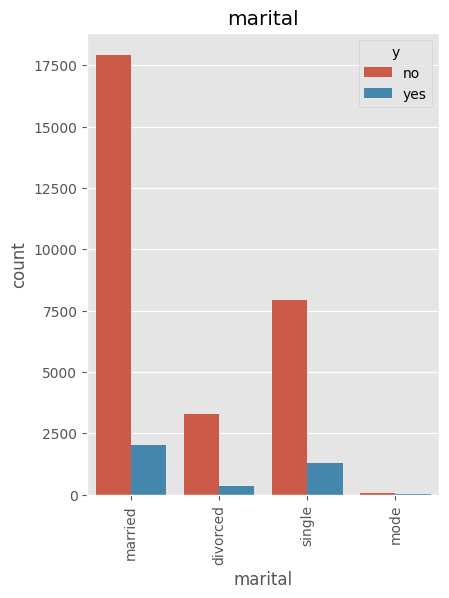

education


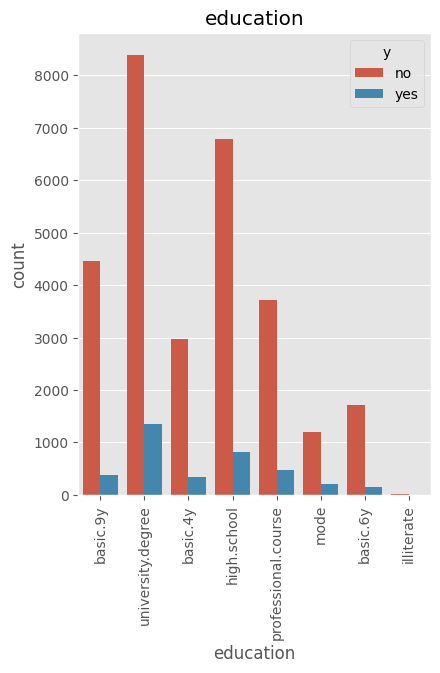

default


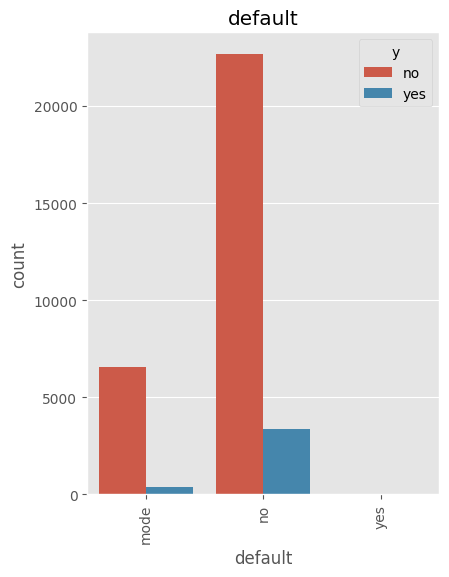

housing


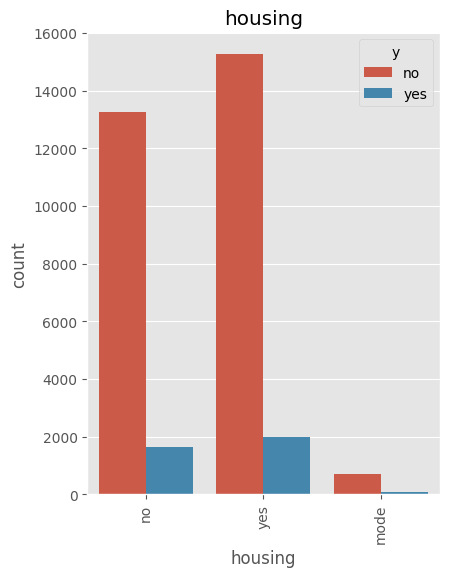

loan


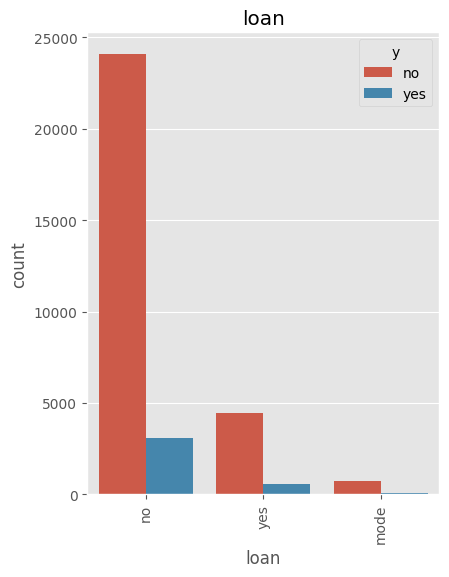

contact


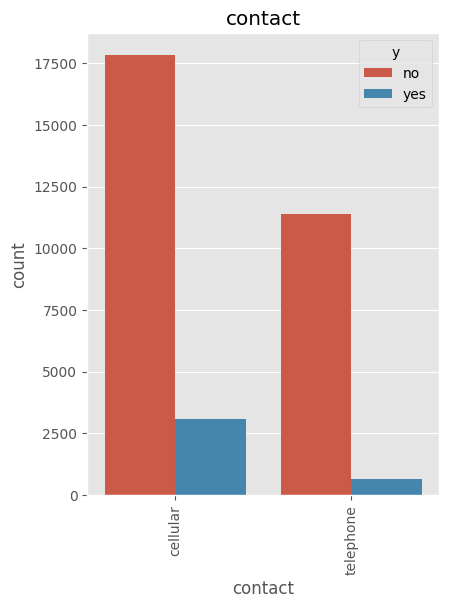

month


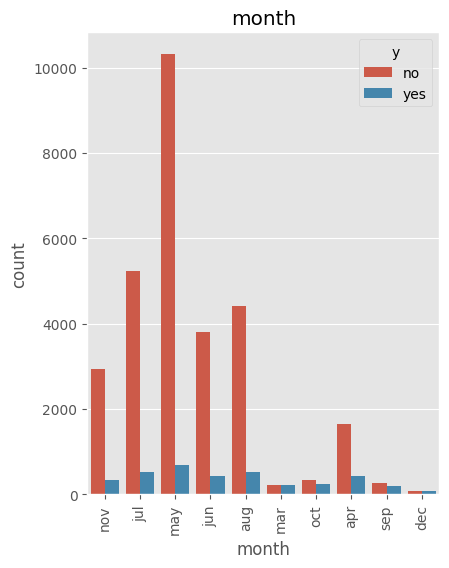

day_of_week


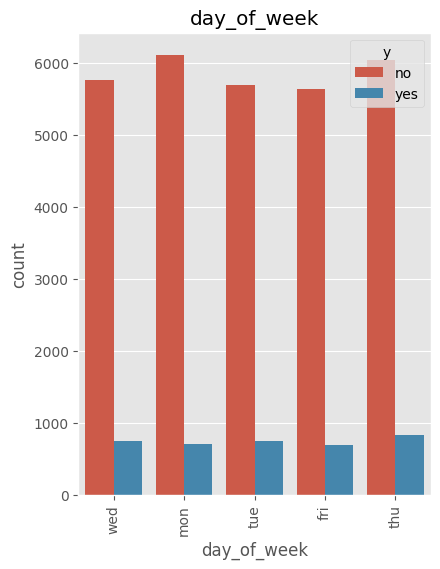

poutcome


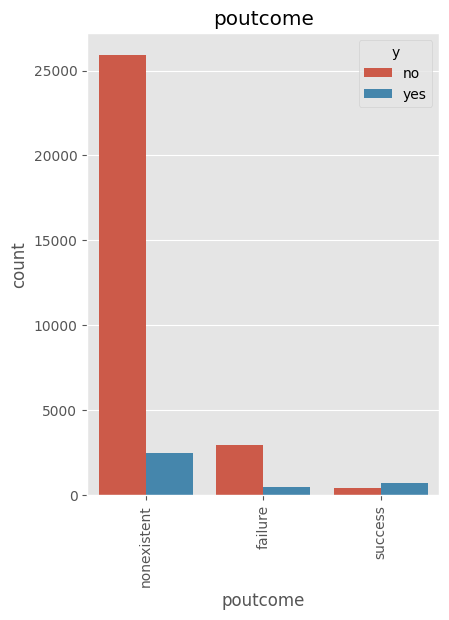

y


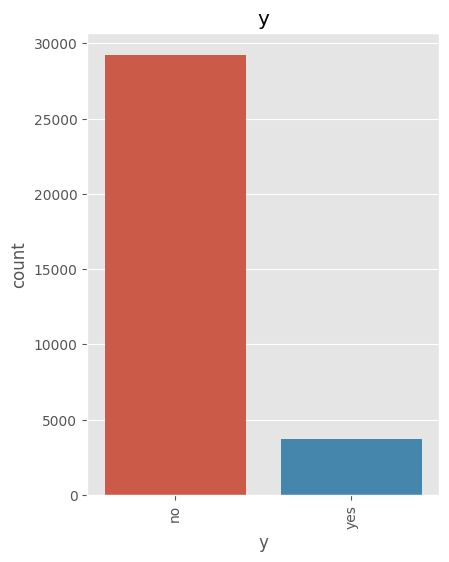

In [222]:
plt.style.use("ggplot")

for column in cat_var:
    print(column)
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    sns.countplot(data=data,x=column,hue=data['y'])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()
    

# Handling outliers

In [223]:
data.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607
std,10.403636,258.975917,2.752326
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


# compute interquantile range to calculate the boundaries

In [224]:
lower_boundries=[]
upper_boundries=[]
for i in ["age","duration","campaign"]:
    IQR=data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_bound=data[i].quantile(0.25)-(1.5*IQR)
    upper_bound=data[i].quantile(0.75)+(1.5*IQR)
    
    print(i,":",lower_bound,",",upper_bound)
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)


age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [225]:
lower_boundries

[np.float64(9.5), np.float64(-221.0), np.float64(-2.0)]

In [226]:
upper_boundries

[np.float64(69.5), np.float64(643.0), np.float64(6.0)]

# replace the all the outliers which is greater then upper boundary by upper boundary


In [227]:
j=0

for i in ["age","duration","campaign"]:
    data.loc[data[i]>upper_boundries[j],i]=int(upper_boundries[j])
    j=j+1


# data["age"] = data["age"].clip(upper=upper_boundries[0])
# data["duration"] = data["duration"].clip(upper=upper_boundries[1])
# data["campaign"] = data["campaign"].clip(upper=upper_boundries[2])


# without outliers

In [228]:
data.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,39.929894,234.923915,2.271077
std,10.118566,176.854558,1.546302
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,69.000000,643.000000,6.000000


# categorical features

In [229]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

# check categorical  class

In [230]:
for i in cat_var:
    print(i, ":",data[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'mode' 'housemaid']
marital : ['married' 'divorced' 'single' 'mode']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'mode' 'basic.6y' 'illiterate']
default : ['mode' 'no' 'yes']
housing : ['no' 'yes' 'mode']
loan : ['no' 'yes' 'mode']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


# initializing the labelEncoder

In [233]:
label=LabelEncoder()

data[cat_var]=data[cat_var].apply(label.fit_transform)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,1,1,0,7,4,227,4,1,0
1,37,2,1,7,1,1,1,1,7,4,202,2,0,0
2,69,6,1,0,1,1,1,0,3,1,643,1,1,1
3,36,0,1,7,1,2,1,1,6,1,120,2,1,0
4,59,6,0,7,1,1,1,0,4,3,368,2,1,0


In [235]:
# feature variables

X=data.iloc[:,:-1].values

# target variables
y=data.iloc[:,-1].values
print(X)
print(y)

[[ 49   1   1 ... 227   4   1]
 [ 37   2   1 ... 202   2   0]
 [ 69   6   1 ... 643   1   1]
 ...
 [ 54   0   1 ... 131   4   1]
 [ 29   0   1 ... 165   1   1]
 [ 35   0   1 ... 544   3   1]]
[0 0 1 ... 0 0 0]


# Checking Correlation of feature variables

<Axes: >

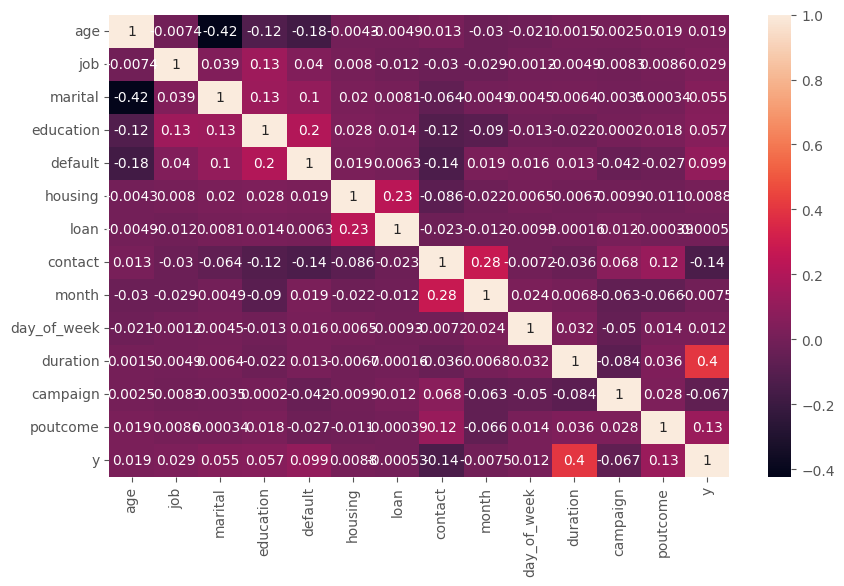

In [237]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [247]:
smote=SMOTETomek(sampling_strategy=0.75)           # #initialising oversampling
x_sm,y_sm=smote.fit_resample(X,y)                  # #implementing oversampling to training data
y_sm=pd.Series(y_sm,name="target")
y_sm.value_counts()


target
0    28992
1    21682
Name: count, dtype: int64

# Splitting resampled data in train and test data

In [248]:
X_train,X_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)

# Gridsearch and hyperparameter tuning
# Logistic Regression

In [254]:
log_reg=LogisticRegression()

log_param={"C":10.0**np.arange(-2,3),"penalty":["l1","l2"]}

kfold=StratifiedKFold(n_splits=5)

gridsearch=GridSearchCV(log_reg,log_param,cv=kfold,scoring="f1_macro",n_jobs=-1,verbose=2)

gridsearch.fit(X_train,y_train)

print("Best score is: ",gridsearch.best_score_)
print("Best parameter is: ",gridsearch.best_params_ )




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score is:  0.7914023926554808
Best parameter is:  {'C': np.float64(100.0), 'penalty': 'l2'}


[[7391 1300]
 [1722 4790]]
0.8012234427415642
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      8691
           1       0.79      0.74      0.76      6512

    accuracy                           0.80     15203
   macro avg       0.80      0.79      0.80     15203
weighted avg       0.80      0.80      0.80     15203



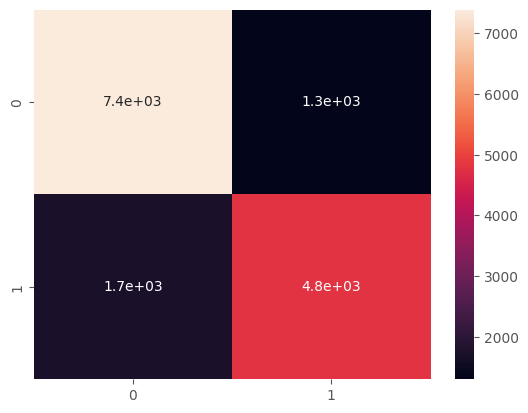

In [257]:
y_predict=gridsearch.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

In [263]:
rf=RandomForestClassifier()

rf_para={"n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)],
         "max_features":['auto','sqrt','log2'],
         "max_depth":[int(x) for x in np.linspace(start=5,stop=30,num=6)],
         "min_samples_split":[5,10,15,100],
         "min_samples_leaf":[1,2,3,10],
         "criterion":['gini',"entropy"] 
         }
rf_kfold=StratifiedKFold(n_splits=5)

randomsearch=RandomizedSearchCV(rf,rf_para,cv=rf_kfold,scoring="f1_macro",n_jobs=-1,verbose=2,n_iter=10)

randomsearch.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 10],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='f1_macro', verbose=2)

[[7708  983]
 [ 674 5838]]
0.8910083536144182
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      8691
           1       0.86      0.90      0.88      6512

    accuracy                           0.89     15203
   macro avg       0.89      0.89      0.89     15203
weighted avg       0.89      0.89      0.89     15203



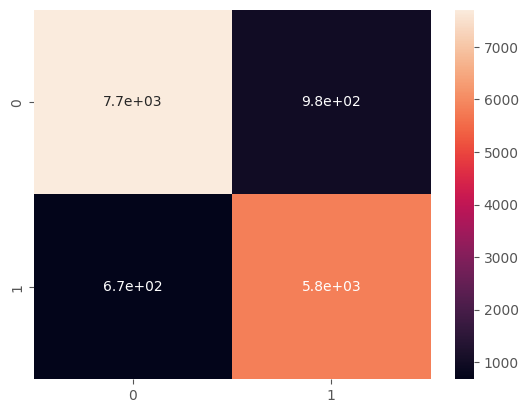

In [266]:
y_predict_rf=randomsearch.predict(X_test)

cm=confusion_matrix(y_test,y_predict_rf)

print(cm)

sns.heatmap(cm,annot=True)

print(accuracy_score(y_test,y_predict_rf))
print((classification_report(y_test,y_predict_rf)))


In [270]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,1,1,0,7,4,227,4,1,0
1,37,2,1,7,1,1,1,1,7,4,202,2,0,0
2,69,6,1,0,1,1,1,0,3,1,643,1,1,1
3,36,0,1,7,1,2,1,1,6,1,120,2,1,0
4,59,6,0,7,1,1,1,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,8,3,3,1,2,1,0,3,3,192,1,1,0
32946,52,10,1,6,1,2,1,0,7,0,64,1,0,0
32947,54,0,1,2,1,1,2,0,3,1,131,4,1,0
32948,29,0,1,7,1,1,1,1,6,0,165,1,1,0


In [272]:
test_data=pd.read_csv("new_test.csv")
test_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,4,1,2,0,2,0,0,6,3,554,1,1
8234,30,7,2,3,0,2,0,0,6,0,159,1,1
8235,33,7,1,3,0,0,0,0,4,1,472,1,0
8236,44,1,1,1,0,2,2,1,6,1,554,5,1


In [273]:
y_predicted=randomsearch.predict(test_data)
y_predicted

array([0, 0, 0, ..., 1, 0, 0], shape=(8238,))

In [275]:
df=pd.DataFrame(y_predicted,columns=["y_predicted"])
df2=pd.concat([test_data,df],axis=1)
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y_predicted
0,32,4,0,6,0,0,0,0,3,3,131,5,1,0
1,37,10,3,6,0,0,0,0,4,3,100,1,1,0
2,55,5,0,5,1,2,0,0,3,2,131,2,1,0
3,44,2,1,0,1,0,0,1,4,3,48,2,1,0
4,28,0,2,3,0,0,0,0,5,0,144,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,4,1,2,0,2,0,0,6,3,554,1,1,1
8234,30,7,2,3,0,2,0,0,6,0,159,1,1,0
8235,33,7,1,3,0,0,0,0,4,1,472,1,0,1
8236,44,1,1,1,0,2,2,1,6,1,554,5,1,0


In [276]:
df2.to_csv("cleaned_data")
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y_predicted
0,32,4,0,6,0,0,0,0,3,3,131,5,1,0
1,37,10,3,6,0,0,0,0,4,3,100,1,1,0
2,55,5,0,5,1,2,0,0,3,2,131,2,1,0
3,44,2,1,0,1,0,0,1,4,3,48,2,1,0
4,28,0,2,3,0,0,0,0,5,0,144,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,4,1,2,0,2,0,0,6,3,554,1,1,1
8234,30,7,2,3,0,2,0,0,6,0,159,1,1,0
8235,33,7,1,3,0,0,0,0,4,1,472,1,0,1
8236,44,1,1,1,0,2,2,1,6,1,554,5,1,0
